## K-Nearest Neighbors Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("travel_times.csv")
data.head()

,x,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
0,1,01-06-2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No,NaN
1,2,01-06-2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No,NaN
2,3,01-04-2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NaN,37.5,35.9,No,NaN
3,4,01-04-2012,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,NaN,39.8,35.6,No,NaN
4,5,01-03-2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,No,NaN


Let's get the variables that we are interested in.

In [3]:
data = data[["Distance", "AvgSpeed", "TotalTime"]]
data.head()

,Distance,AvgSpeed,TotalTime
0,51.29,78.3,39.3
1,51.63,81.8,37.9
2,51.27,82.0,37.5
3,49.17,74.2,39.8
4,51.15,83.4,36.8


Let's scale the data.

In [4]:
scaler = StandardScaler()
scaled_data_df = pd.DataFrame(scaler.fit_transform(data))
scaled_data_df = scaled_data_df.rename({0:"Distance", 1:"AvgSpeed", 2:"TotalTime"}, axis=1)
scaled_data_df.head()

,Distance,AvgSpeed,TotalTime
0,0.234061,0.335833,-0.381163
1,0.492032,0.643338,-0.586058
2,0.218887,0.660909,-0.644600
3,-1.374462,-0.024386,-0.307986
4,0.127838,0.783911,-0.747048


Splitting the data into training and testing sets.

In [5]:
X = scaled_data_df.iloc[:,:-1]
y = scaled_data_df["TotalTime"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Modeling the data

In [6]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

Hyperparameter Tuning the n_neighbors parameter range 1 - 50

In [7]:
results = []
for i in range(1, 51):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    preds = knn.predict(X_test)
    results.append(mean_squared_error(y_test, preds))

myDict = {"Num K": [x for x in range(1, 51)], "MSE": results}

results_df = pd.DataFrame(myDict)

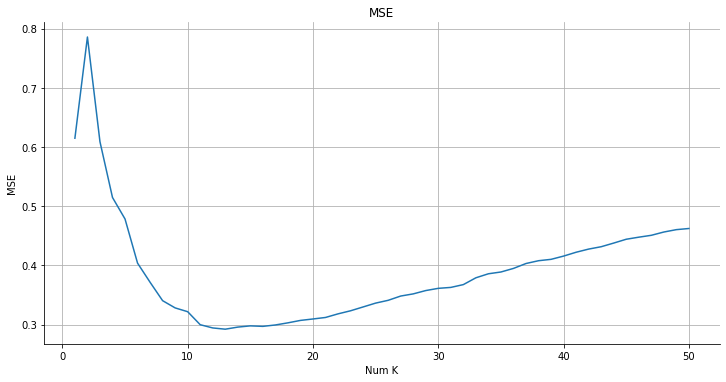

In [8]:
sns.relplot(y="MSE", x="Num K", kind= "line", aspect=2, height=5, data=results_df)
plt.title("MSE")
plt.grid()

In [9]:
results_df_sorted = results_df.sort_values(by="MSE")
k = results_df_sorted.iloc[0,0]
print(f"The best 'Num K' is {k}")

The best 'Num K' is 13


In [10]:
# Mean Squared Error
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
print(f"K-Nearest Neighbors MSE: {mean_squared_error(y_test, preds)}")

K-Nearest Neighbors MSE: 0.29221763191677197


### Conclusion

Yes, the average time can be predicted by distance and average speed using K-Nearest Neighbors.